# IS590DV - Final Project
## Group Name: Allied Against An Anonymous Axis
### Group Members: Jenna Jordan, Xue Lu, Gianni Pezzarossi, Dennis Piehl, Ryan Wang

In [1]:
# Libraries used for Land area plots.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import gridspec

In [2]:
#Jenna's Map

In [3]:
import seaborn as sns

## Wars by Region and Type: CoW vs UCDP/PRIO

The Correlates of War (CoW) and UCDP/PRIO are the two most dominant data sources for conflict and peace researchers. They follow different methods to record conflicts, and record information according to different data organization schemas. However, both track much of the same information for conflicts. Here, you can see how the two datasets compare in tracking conflicts according to their type and where they occur.

Some differences of note: 

- CoW has war data from 1816 - 2007, while UCDP/PRIO has war data from 1946 - 2018.
- CoW only tracks conflicts that result in over 1,000 deaths per year, while UCDP/PRIO tracks conflicts that result in over 25 deaths per year - but records whether that conflict resulted in over 1,000 deaths per year. For the purpose of comparison, only conflicts with 1,000 deaths per year are plotted
- CoW tracks 4 types of war: inter-state, intra-state, extra-state, and non-state. UCDP/PRIO does not track non-state conflict, and they divide intra-state war into two categories: intrastate and internationalized intrastate (extra-state corresponds to extrasystemic). Furthermore, CoW and UCDP/PRIO have different definitions for what is considered an intrastate vs extrastate war.

In [4]:
cow_regions_toplot = pd.read_csv("./cow_regions_areaplot_data.csv")
cow_type_toplot = pd.read_csv("./cow_type_areaplot_data.csv")
ucdp_regions_toplot = pd.read_csv("./ucdp_regions_areaplot_data.csv")
ucdp_type_toplot = pd.read_csv("./ucdp_type_areaplot_data.csv")

In [5]:
cow_regions_toplot_trimmed = cow_regions_toplot[cow_regions_toplot['year'] > 1945]
cow_type_toplot_trimmed = cow_type_toplot[cow_regions_toplot['year'] > 1945]

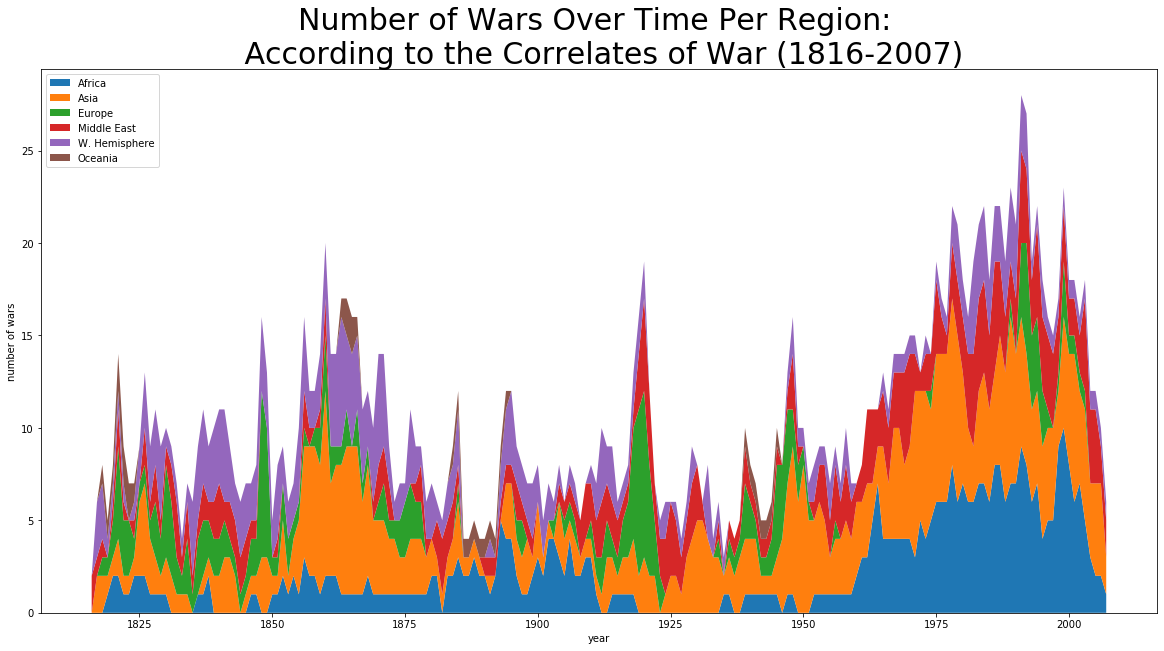

In [6]:
plt.rcParams["figure.figsize"] = (20,10)
plt.stackplot(cow_regions_toplot['year'], cow_regions_toplot['Africa'], cow_regions_toplot['Asia'], cow_regions_toplot['Europe'], 
              cow_regions_toplot['Middle East'], cow_regions_toplot['W. Hemisphere'], cow_regions_toplot['Oceania'], 
             labels=['Africa', 'Asia', 'Europe', 'Middle East', 'W. Hemisphere', 'Oceania'])
plt.legend(loc='upper left')
plt.xlabel('year')
plt.ylabel('number of wars')
plt.title('Number of Wars Over Time Per Region: \n According to the Correlates of War (1816-2007)', size='30')
plt.show()

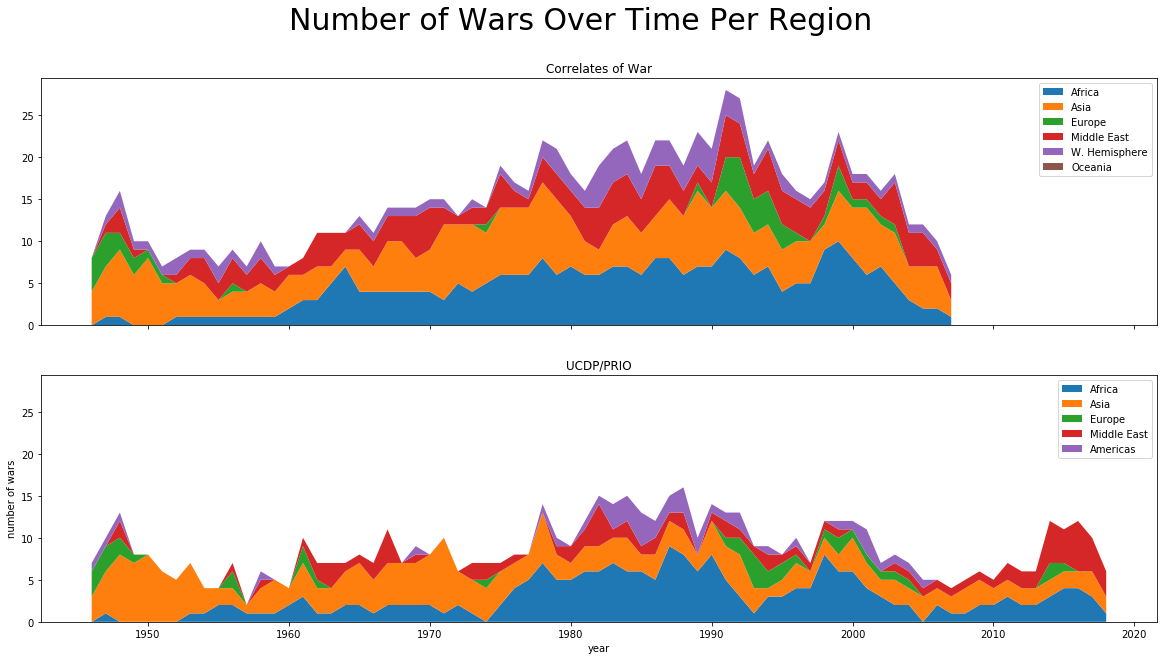

In [7]:
plt.rcParams["figure.figsize"] = (20,10)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
ax1.stackplot(cow_regions_toplot_trimmed['year'], cow_regions_toplot_trimmed['Africa'], cow_regions_toplot_trimmed['Asia'], cow_regions_toplot_trimmed['Europe'], 
              cow_regions_toplot_trimmed['Middle East'], cow_regions_toplot_trimmed['W. Hemisphere'], cow_regions_toplot_trimmed['Oceania'], 
             labels=['Africa', 'Asia', 'Europe', 'Middle East', 'W. Hemisphere', 'Oceania'])
ax2.stackplot(ucdp_regions_toplot['year'], ucdp_regions_toplot['Africa'], ucdp_regions_toplot['Asia'], ucdp_regions_toplot['Europe'], 
              ucdp_regions_toplot['Middle East'], ucdp_regions_toplot['Americas'], 
             labels=['Africa', 'Asia', 'Europe', 'Middle East', 'Americas'])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax1.set_title('Correlates of War')
ax2.set_title('UCDP/PRIO')
plt.xlabel('year')
plt.ylabel('number of wars')
plt.suptitle('Number of Wars Over Time Per Region', size='30')
plt.show()

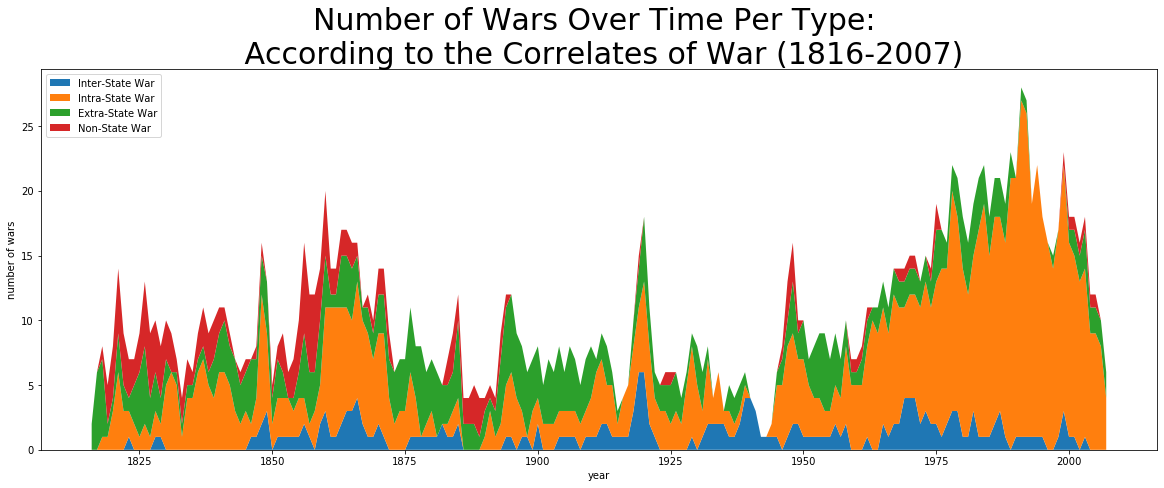

In [8]:
plt.rcParams["figure.figsize"] = (20,7)
plt.stackplot(cow_type_toplot['year'], cow_type_toplot['Inter-State War '], cow_type_toplot['Intra-State War '], 
              cow_type_toplot['Extra-State War '], cow_type_toplot['Non-State War '], 
             labels=['Inter-State War', 'Intra-State War', 'Extra-State War', 'Non-State War'])
plt.legend(loc='upper left')
plt.xlabel('year')
plt.ylabel('number of wars')
plt.title('Number of Wars Over Time Per Type: \n According to the Correlates of War (1816-2007)', size=30)
plt.show()

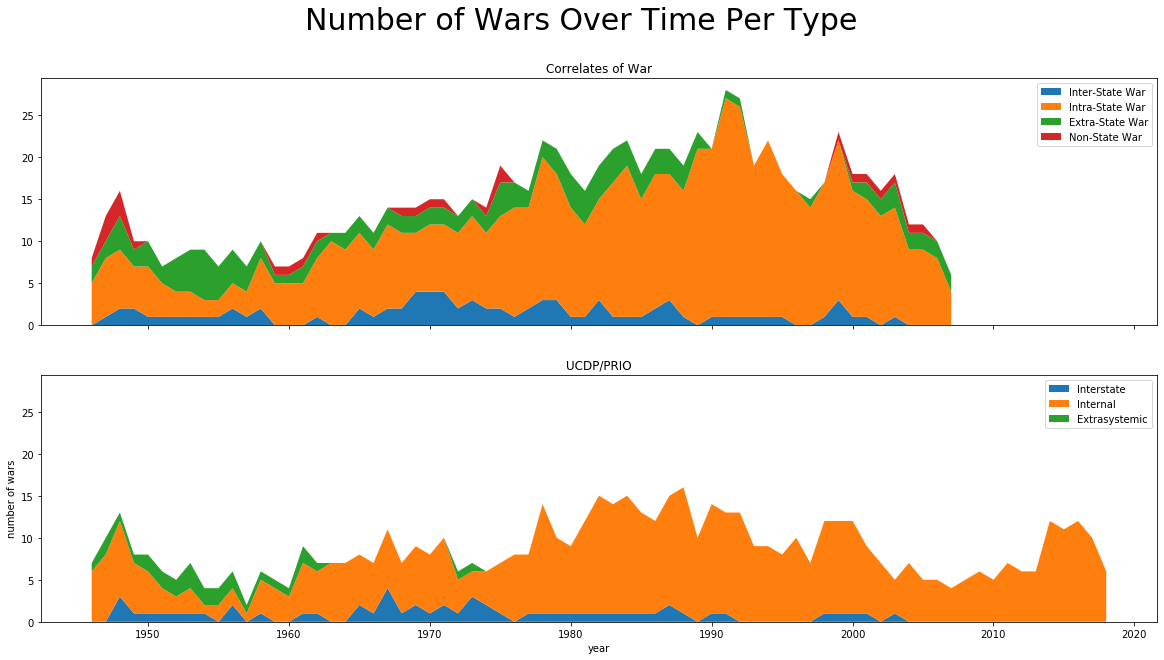

In [9]:
plt.rcParams["figure.figsize"] = (20,10)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True,)
ax1.stackplot(cow_type_toplot_trimmed['year'], cow_type_toplot_trimmed['Inter-State War '], 
              cow_type_toplot_trimmed['Intra-State War '], cow_type_toplot_trimmed['Extra-State War '], 
              cow_type_toplot_trimmed['Non-State War '], labels=['Inter-State War', 'Intra-State War', 'Extra-State War', 'Non-State War'])
ax2.stackplot(ucdp_type_toplot['year'], ucdp_type_toplot['Interstate'], ucdp_type_toplot['Internal'], 
              ucdp_type_toplot['Extrasystemic'], labels=['Interstate', 'Internal', 'Extrasystemic'])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax1.set_title('Correlates of War')
ax2.set_title('UCDP/PRIO')
plt.xlabel('year')
plt.ylabel('number of wars')
plt.suptitle('Number of Wars Over Time Per Type', size='30')
plt.show()

This last plot really makes clear some of the war type coding differences between CoW and UCDP/PRIO. It is likely that wars being recorded as "Extra-State" in CoW are being recorded as "Internal" in UCDP/PRIO

### Dennis Piehl

In [10]:
# Libraries used for Sankey plots
import plotly.graph_objects as go
from matplotlib.ticker import MaxNLocator
import copy

### COW Data

In [25]:
## Using COW data
## Make a Sankey plot of Region --> War Type --> Country 
## Help with Sankey plot obtained here: plot.ly/python/sankey-diagram/

data = pd.read_csv('./COW_Sankey_data.csv')

srcs = data['srcs'].to_list()
tgts = data['tgts'].to_list()
vals = data['vals'].to_list()
lbls = ['Europe', 'Middle East', 'W. Hemisphere', 'Asia', 'Africa', 'Oceania', 'Inter-State', 'Extra-State', 'Intra-State', 'Non-State', 'United Kingdom', 'France', 'Russia', 'China', 'Turkey', 'United States of America', 'Spain', 'Italy', 'Ethiopia', 'Mexico', 'Argentina', 'Egypt', 'Japan', 'Iraq', 'Germany', 'Netherlands', 'Vietnam', 'Austria-Hungary', 'Peru', 'Afghanistan', 'Portugal', 'Brazil', 'Indonesia', 'India', 'Colombia', 'Syria', 'Cuba', 'Philippines', 'El Salvador', 'Yugoslavia']


fig = go.Figure(data=[go.Sankey(
    node = {
        "pad": 15,
        "thickness": 20,
        "line": {"color": "black", "width": 0.5},
        "label": lbls,
        "color": ['royalblue','rebeccapurple','steelblue','goldenrod', 'forestgreen', 'skyblue', 'fuchsia', 'darkorange', 'red', 'sienna']
    },
    link = {
        "source": srcs,
        "target": tgts,
        "value": vals
    }
)])

fig.update_layout(title_text = """Wars by Region, Conflict Type, and Country (1816-2008)<br>Only the top 50 countries (or, "Polities") with highest number of wars are presented on the far right.<br>Data source: <a href='http://www.correlatesofwar.org/data-sets'>Correlates of War</a>""", font_size = 10, width=1024, height=768)
fig.show()

In the "Sankey" plot above, the number of wars occuring from 1816-2008 for each region of the world (Asia, Africa, Middle East, Western Hemisphere, Europe, and Oceania) are depicted through the relative size of each reion's wedge. The paths branching from each region illustrate the relative number of each type of war (extra-state, intra-state, inter-state, and non-state) that comprise the total number of wars occuring in the corresponding region. The final group of wedges on the right depict the 50 most war-engaged countries in the past centurty, in which the size of each country's block corresponds to the number of wars in which it has been involved.

### UCDP Data

In [12]:
## Using UCDP data
## Make a Sankey plot of Incompatibility --> Type of conflict --> Region 
## Help with Sankey plot obtained here: plot.ly/python/sankey-diagram/

data = pd.read_csv('./UCDP_Sankey_data.csv')

srcs = data['srcs'].to_list()
tgts = data['tgts'].to_list()
vals = data['vals'].to_list()
lbls = ['Territory', 'Government', 'Territory AND Government', 'Extrasystemic', 'Interstate', 'Internal', 'Intenantionalized Internal', 'Europe', 'Middle East', 'Asia', 'Africa', 'Americas', 'India', 'Ethiopia', 'Myanmar (Burma)', 'Russia (Soviet Union)', 'Mali', 'Nigeria', 'Syria', 'Cameroon', 'Malaysia', 'Iran', 'Indonesia', 'Bosnia-Herzegovina', 'DR Congo (Zaire)', 'Pakistan', 'Israel', 'Serbia (Yugoslavia)', 'Georgia', 'Yemen (North Yemen)', 'Ukraine', 'Iraq', 'United States of America', 'Cuba', 'Peru', 'Paraguay', 'Panama']

fig = go.Figure(data=[go.Sankey(
    node = {
        "pad": 15,
        "thickness": 20,
        "line": {"color": "black", "width": 0.5},
        "label": lbls,
        "color": ['sienna','dimgray','tan','darkorange','fuchsia', 'red', 'crimson', 'royalblue', 'rebeccapurple', 'goldenrod', 'forestgreen', 'steelblue']
    },
    link = {
        "source": srcs,
        "target": tgts,
        "value": vals
    }
)])

fig.update_layout(title_text = """Conflicts by Underlying Incompatibility, Type of Conflict, and Region (1946-2018)<br>Top 5 countries (or, "Locations") with highest number of conflicts in each region are displayed on the far right.<br>Data source: <a href='https://www.prio.org/Data/Armed-Conflict/UCDP-PRIO/'>UCDP/PRIO Armed Conflict</a>""", font_size = 10)
fig.show()


The visualization presented above aims at conveying the correlation that exists between the underlying issue (or, "incompatiblity") being fought over in all conflicts (from 1946-2018) and the type of conflict through which the war occurs as well as the regions of the world at which these correlations are observed. Accordingly, this interactive Sankey-style plot illustrates the relative number of conflicts associated with each correlation (based on the size of each node/wedge) as well as the exact quantity of conflicts for each component on the plot (by hovering your mouse over the block). 

On the far left of the plot, the three different types of incompatibilities are shown (territory, governemnt, and territory AND government), in which the relative height of each wedge corresponds to the number of conflicts that have occurred for that particular underlying issue. The branching paths that extend from each incompatiblity links to the different types of conflicts that are represented by that issue, which illustrates the relative differences in the number of each conflict type that can be attribute from each corresponding incompatibility. The next set of branching illustrates the number of each type of conflict in which each region of the world has been involved. Finally, the 5 most conflict-ridden countries from each region of the world are shown at the very far right of the plot, extending from the region to which they cocrrespond.   

To revisualize this set of data for allowing a more quantitative interpretation and comparison of the number of conflicts, all of the data presented above are re-illustrated in the form of bar plots below.

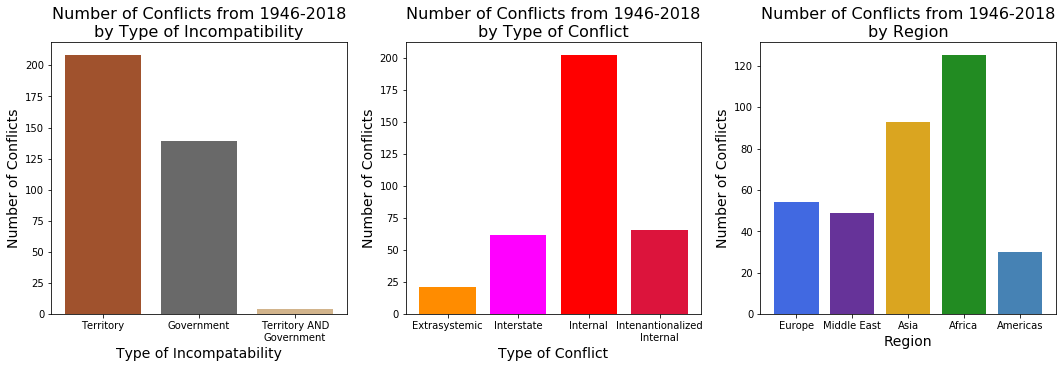

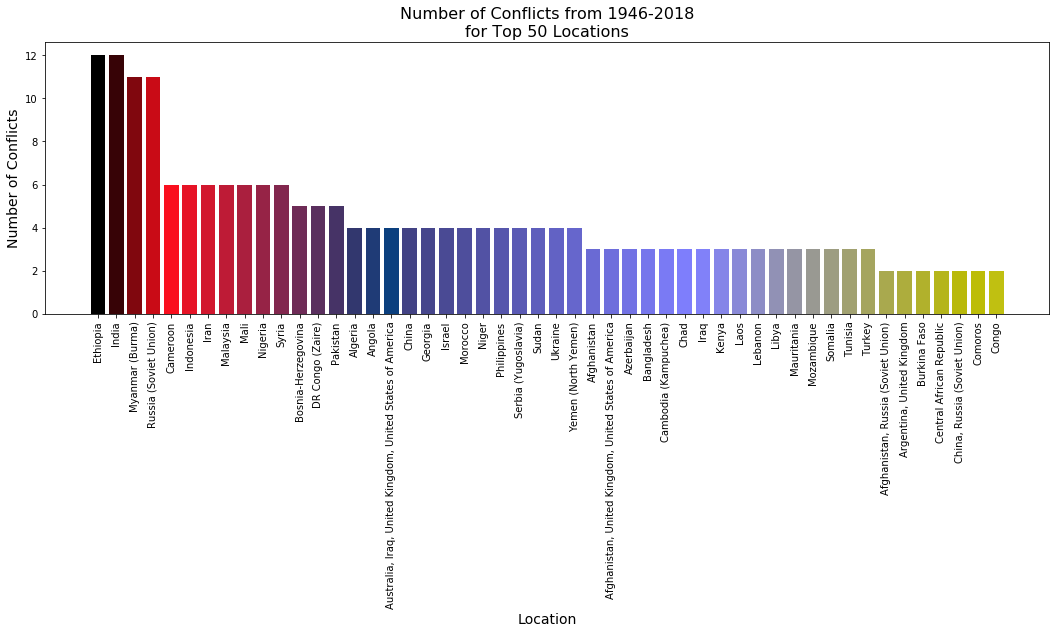

In [13]:
## Make bar plots illustrating quantitative values in Sankey plot above
# Data already pre-processed in Part 2 notebook -- resulting values are specified explicitly here to avoid need to re-wrangle data.
# Help with colormapping of barplots obtained here: https://stackoverflow.com/questions/51204505/python-barplot-with-colorbar

# Group number of conflicts by incompatibility, type of conflict, region, and location [pre-processed data; values specified explicitly here] 
incompatibilities = pd.Series({1: 208, 2: 139, 3: 4})
conflict_types =  pd.Series({1: 21, 2: 62, 3: 202, 4: 66})
region_ids =  pd.Series({1: 54, 2: 49, 3: 93, 4: 125, 5: 30})
locations = pd.read_csv('UCDP_barplot_location_data.csv')
topN_locations = locations.nlargest(50, 'conflict_id').reset_index()

# Plot data
plt.clf()

plt.figure(1)
plt.figure(1).set_figheight(5)
plt.figure(1).set_figwidth(18)

plt.subplot(131)
plt.bar(incompatibilities.index, incompatibilities.values, width=0.8, color=['sienna','dimgray','tan'])
plt.xlabel('Type of Incompatability', fontsize=14)
plt.xticks(np.array(incompatibilities.index).astype(int), ['Territory','Government','Territory AND\nGovernment'])
plt.ylabel('Number of Conflicts', fontsize=14)
plt.title('Number of Conflicts from 1946-2018\nby Type of Incompatibility', fontsize=16)

plt.subplot(132)
plt.bar(conflict_types.index, conflict_types.values, width=0.8, color=['darkorange','fuchsia', 'red', 'crimson'])
plt.xlabel('Type of Conflict', fontsize=14)
plt.xticks(np.array(conflict_types.index).astype(int), ['Extrasystemic','Interstate', 'Internal', 'Intenantionalized\nInternal'])
plt.ylabel('Number of Conflicts', fontsize=14)
plt.title('Number of Conflicts from 1946-2018\nby Type of Conflict', fontsize=16)

plt.subplot(133)
plt.bar(region_ids.index, region_ids.values, width=0.8, color=['royalblue', 'rebeccapurple', 'goldenrod', 'forestgreen', 'steelblue'])
plt.xlabel('Region', fontsize=14)
plt.xticks(np.array(region_ids.index).astype(int), ['Europe', 'Middle East', 'Asia', 'Africa', 'Americas'])
plt.ylabel('Number of Conflicts', fontsize=14)
plt.title('Number of Conflicts from 1946-2018\nby Region', fontsize=16)


plt.figure(2)
plt.figure(2).set_figheight(5)
plt.figure(2).set_figwidth(18)

data_color = [float(i) / float(len(topN_locations)) / 1.3 for i in range(len(topN_locations))]
my_cmap = plt.cm.get_cmap('gist_stern')
colors = my_cmap(data_color)

plt.bar(topN_locations.index, topN_locations.conflict_id, width=0.8, color=colors)
plt.xlabel('Location', fontsize=14)
plt.xticks(np.array(topN_locations.index).astype(int),topN_locations.location.to_list(), rotation='vertical')
plt.ylabel('Number of Conflicts', fontsize=14)
plt.title('Number of Conflicts from 1946-2018\nfor Top 50 Locations', fontsize=16)

plt.show()

## Land area by number of involved conflicts as a function of Country
### Gianni Pezzarossi


In [14]:
top_full = pd.read_csv("landarea-conflict-top_full.csv")
bottom_full = pd.read_csv("landarea-conflict-bottom_full.csv")
sorted_counts_full = pd.read_csv("landarea-conflict-sorted_counts_full.csv")

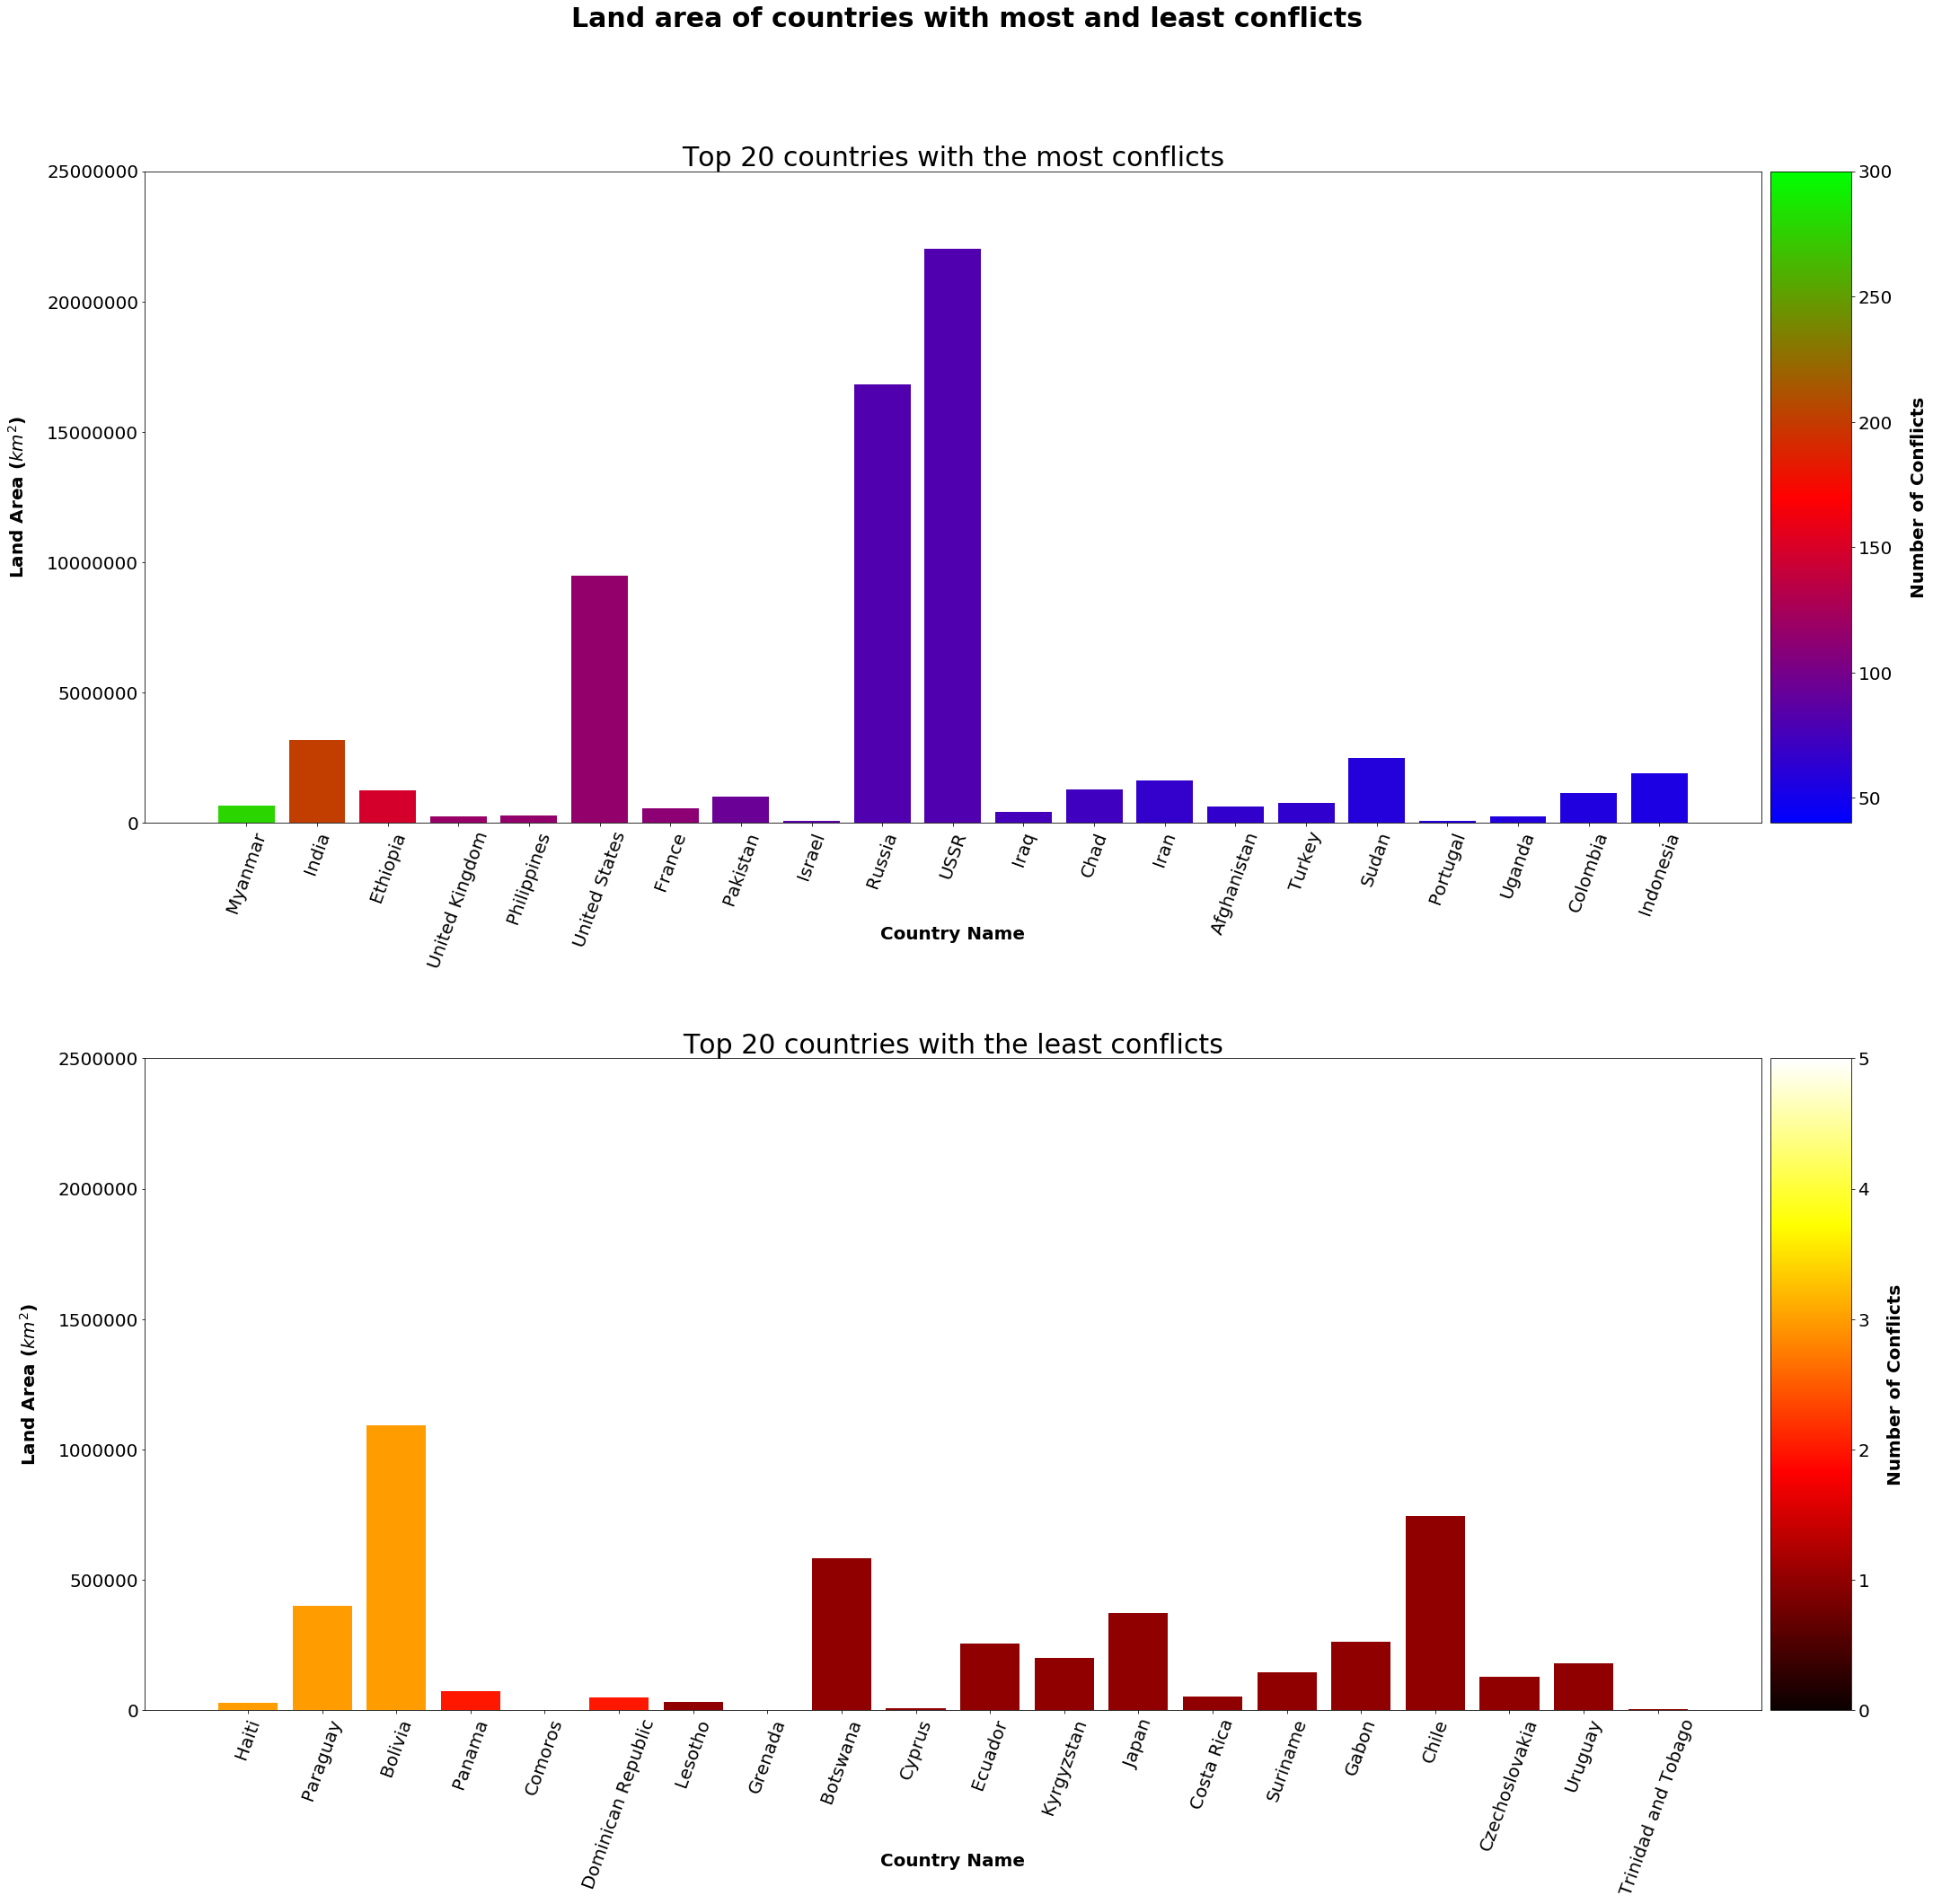

In [15]:
my_cmap = cm.get_cmap('brg')
my_cmap2 = cm.get_cmap('hot')
my_norm = Normalize(vmin=40, vmax=300)
my_norm2 = Normalize(vmin=0, vmax=5)

fig2 = plt.figure(figsize=(30,30))
gs = gridspec.GridSpec(2, 2, width_ratios=[20, 1]) 
ax1 = plt.subplot(gs[0])
ax1.bar(top_full['country_name'],top_full['area'], color=my_cmap(my_norm(top_full['number_of_conflicts'].to_list())))
ax1.ticklabel_format(axis="y", style="plain")
ax1.set_title("Top 20 countries with the most conflicts", fontsize=30)
ax1.set_xlabel('Country Name', fontsize=20, labelpad=-50, fontweight='bold')
ax1.set_ylim([0,25000000])


ax2 = plt.subplot(gs[1])
cb1 = matplotlib.colorbar.ColorbarBase(ax2, cmap=my_cmap, norm=my_norm, orientation='vertical')
cb1.set_label('Number of Conflicts', fontsize=20, fontweight='bold', labelpad=20)

ax3 = plt.subplot(gs[2])
ax3.bar(bottom_full['country_name'],bottom_full['area'], color=my_cmap2(my_norm2(bottom_full['number_of_conflicts'].to_list())))
ax3.set_title("Top 20 countries with the least conflicts", fontsize=30)
ax3.ticklabel_format(axis="y", style="plain")
ax3.set_xlabel('Country Name', fontsize=20, labelpad=-50, fontweight='bold')
ax3.set_ylim([0,2500000])

ax4 = plt.subplot(gs[3])
cb2 = matplotlib.colorbar.ColorbarBase(ax4, cmap=my_cmap2, norm=my_norm2, orientation='vertical')
cb2.set_label('Number of Conflicts', fontsize=20, fontweight='bold', labelpad=20)

ax3.set_xlabel('Country Name', fontsize=20)
for ax in (ax1,ax3):
    ax.set_ylabel('Land Area ($km^2$)', fontsize=20, fontweight='bold', labelpad=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    
for ax_cmap in (ax2,ax4):
    ax_cmap.xaxis.set_tick_params(labelsize=20)
    ax_cmap.yaxis.set_tick_params(labelsize=20)

for ax in fig2.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=70)

    
plt.suptitle("Land area of countries with most and least conflicts", fontsize=30, fontweight='bold')
plt.subplots_adjust(hspace=200)
plt.tight_layout(rect=[0, 0, 1, 0.95])

The first important thing to note about these graphs is that the y-axis scale in the top20 chart is actually an order of magnitude greater than the bottom20 chart (max of 25,000,000 instead of 2,500,000). Setting the plots to the same scale ended up making the bottom 20 bars almost hidden due to the drastic difference in scale. As such, a limit was placed on the y axis in order to make sure the bars can for the most part show up. This does show that there is a correlation to land area and number of conflicts. The larger a country, the better the chance that they have been involved in a large amount of conflicts.

An important question to ask though is if this trend is continuous across the whole dataset. As such, we explore the entire series. We sort the data in the same manner as the previous graphs and see if the expected trend held throughout the whole dataset.

In [16]:
sorted_counts_full = pd.read_csv("landarea-conflict-sorted_counts_full.csv")

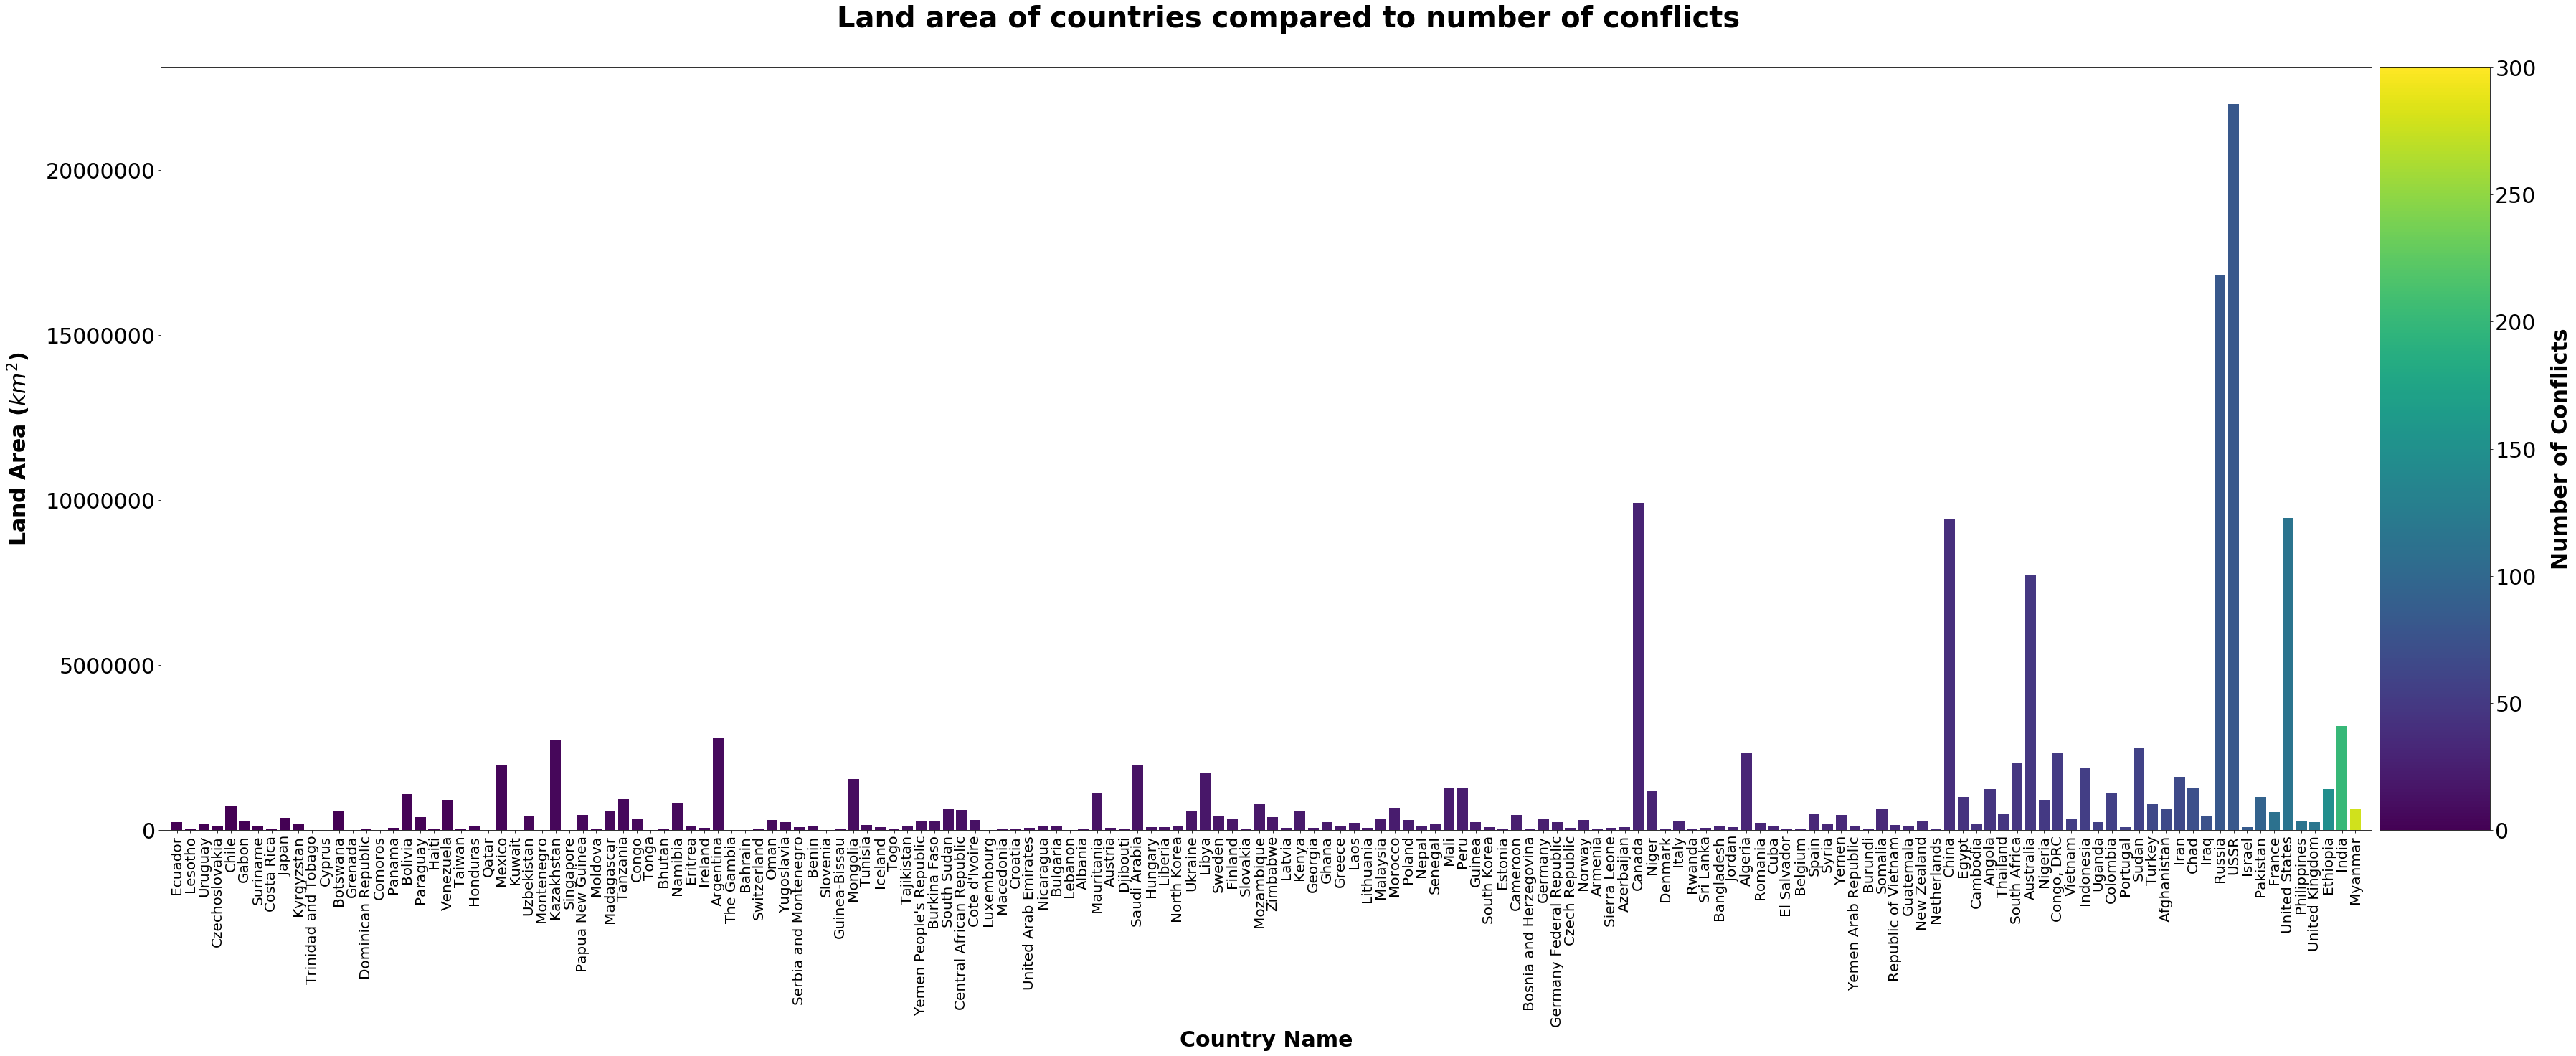

In [17]:
my_cmap3 = cm.get_cmap('viridis')
my_norm3 = Normalize(vmin=0, vmax=300)


fig3 = plt.figure(figsize=(50,30))
gs2 = gridspec.GridSpec(1, 2, width_ratios=[20, 1]) 
nax1 = plt.subplot(gs2[0])

nax1.bar(sorted_counts_full['country_name'].astype(str),sorted_counts_full['area'], 
         color=my_cmap3(my_norm3(sorted_counts_full['number_of_conflicts'].to_list())))

nax1.ticklabel_format(axis="y", style="plain")

nax1.set_xlabel('Country Name', fontsize=30, fontweight='bold')
#nax1.set_xticks([])

nax2 = plt.subplot(gs2[1])
ncb = matplotlib.colorbar.ColorbarBase(nax2, cmap=my_cmap3, norm=my_norm3, orientation='vertical')
ncb.set_label('Number of Conflicts', fontsize=30, fontweight='bold', labelpad=20)

nax1.set_ylabel('Land Area ($km^2$)', fontsize=30, fontweight='bold', labelpad=20)
nax1.xaxis.set_tick_params(labelsize=20)
nax1.yaxis.set_tick_params(labelsize=30)
    
nax2.xaxis.set_tick_params(labelsize=30)
nax2.yaxis.set_tick_params(labelsize=30)

    
plt.suptitle("Land area of countries compared to number of conflicts", fontsize=40, fontweight='bold')
for ax in fig3.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)
    ax.margins(0.005, None)

plt.tight_layout(rect=[0, 0.3, 1, 0.95])

All 203 rows show an increasing trend which confirms that larger countries tend to be players in more conflicts than smaller countries. More specifically, any country over 5,000,000 $km^2$ is all but guaranteed to be in the top third in regard to number of conflicts they have been a party to. Below that, land area can't be used as an indicator for the likelihood a country will have been involved in a conflict.

In [18]:
# Ryan's Graphs

In [19]:
# Xue's Graphs